# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [44]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as s
import numpy as n

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = p.read_csv("creditcard.csv")

In [47]:
del data['Merchant_id']
del data['TransactionDate']

In [48]:
df = data.dropna()

In [49]:
df.columns

Index(['AverageAmountTransactionDay', 'TransactionAmount', 'Is_declined',
       'TotalNumberOfDeclinesDay', 'isForeignTransaction', 'isHighRiskCountry',
       'DailyChargebackAvgAmt', '6_MonthAvgChbkAmt', '6_MonthChbkFreq',
       'isFradulent'],
      dtype='object')

In [50]:
df.head()

,AverageAmountTransactionDay,TransactionAmount,Is_declined,TotalNumberOfDeclinesDay,isForeignTransaction,isHighRiskCountry,DailyChargebackAvgAmt,6_MonthAvgChbkAmt,6_MonthChbkFreq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [56]:
df.dtypes

AverageAmountTransactionDay      int32
TransactionAmount                int32
Is_declined                     object
TotalNumberOfDeclinesDay         int64
isForeignTransaction            object
isHighRiskCountry               object
DailyChargebackAvgAmt            int64
6_MonthAvgChbkAmt              float64
6_MonthChbkFreq                  int64
isFradulent                     object
dtype: object

In [57]:
for i in df:
    if df[i].dtype!="object":
        df[i]=df[i].astype(int)

In [58]:
df.dtypes

AverageAmountTransactionDay     int32
TransactionAmount               int32
Is_declined                    object
TotalNumberOfDeclinesDay        int32
isForeignTransaction           object
isHighRiskCountry              object
DailyChargebackAvgAmt           int32
6_MonthAvgChbkAmt               int32
6_MonthChbkFreq                 int32
isFradulent                    object
dtype: object

In [52]:
print(len(df[df["Is_declined"]=="N"]))
print(len(df[df["Is_declined"]=="Y"]))

3018
57


Text(0.5, 1.0, 'Transaction Amount & Declines')

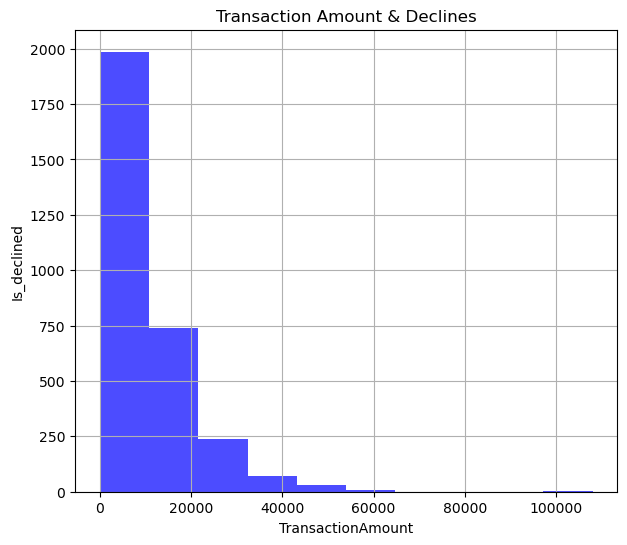

In [53]:
#Histogram Plot of Age distribution
df['TransactionAmount'].hist(figsize=(7,6), color='b', alpha=0.7)
plt.xlabel('TransactionAmount')
plt.ylabel('Is_declined')
plt.title('Transaction Amount & Declines')

N    93.33
Y     6.67
Name: isHighRiskCountry, dtype: float64

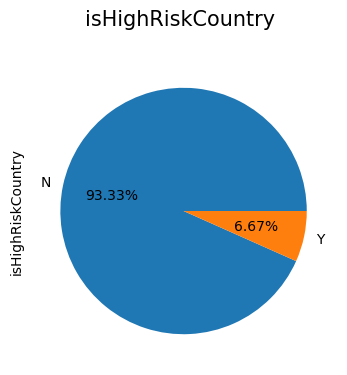

In [33]:
 #Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(4,4), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'isHighRiskCountry')

In [42]:
# print(df.shape[0])#rows
# print(df.shape[1])#columns
# print(df["isFradulent"].value_counts())
print(df["isFradulent"].value_counts()/df.shape[0]*100,2)

N    85.430894
Y    14.569106
Name: isFradulent, dtype: float64 2


N    85.43
Y    14.57
Name: isFradulent, dtype: float64

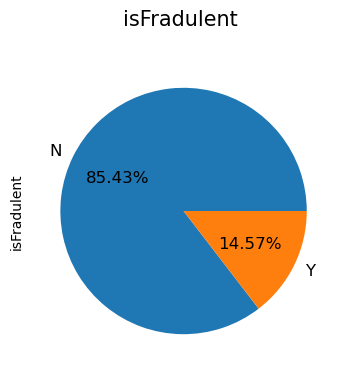

In [32]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(4,4), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'isFradulent')

<Axes: >

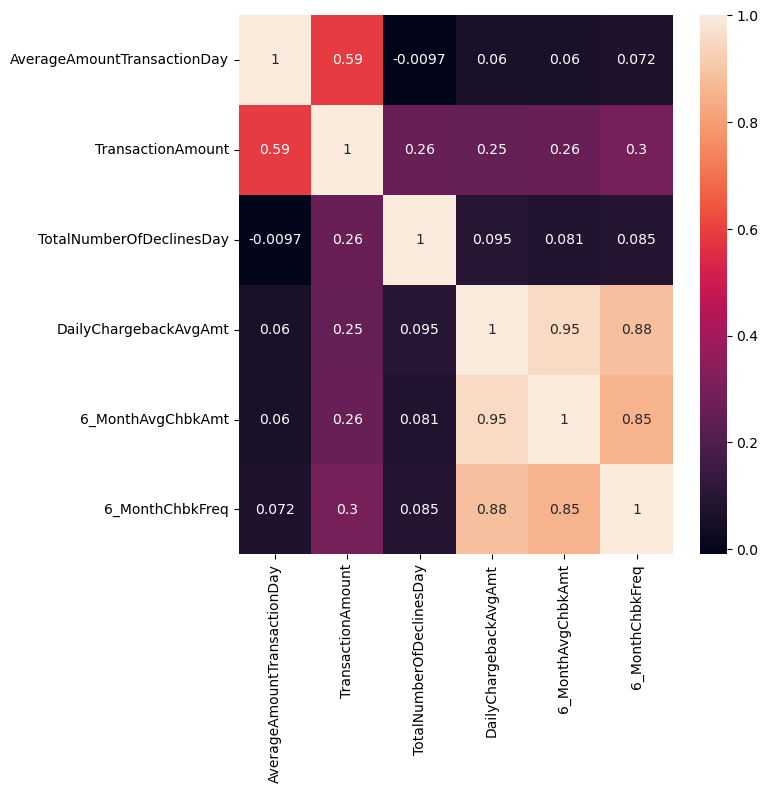

In [17]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(7,7))
s.heatmap(df.corr(), ax=ax,annot=True)

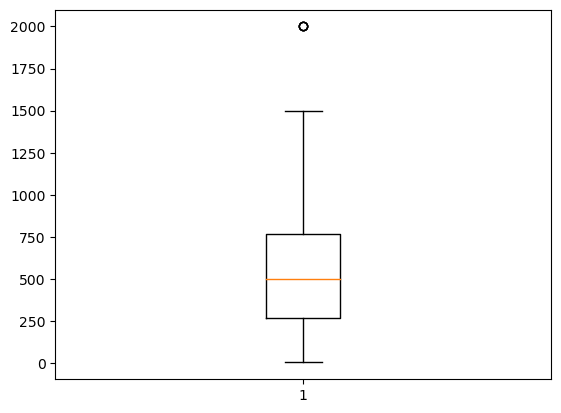

In [13]:
plt.boxplot(df['AverageAmountTransactionDay'])
plt.show()

<Axes: >

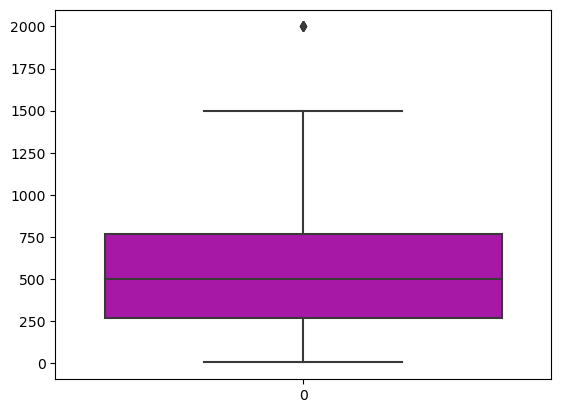

In [14]:
import seaborn as s
s.boxplot(df['AverageAmountTransactionDay'], color='m')

In [15]:
from sklearn.preprocessing import LabelEncoder
var_mod =['AverageAmountTransactionDay', 'TransactionAmount', 'Is_declined',
       'TotalNumberOfDeclinesDay', 'isForeignTransaction', 'isHighRiskCountry',
       'DailyChargebackAvgAmt', '6_MonthAvgChbkAmt', '6_MonthChbkFreq',
       'isFradulent']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

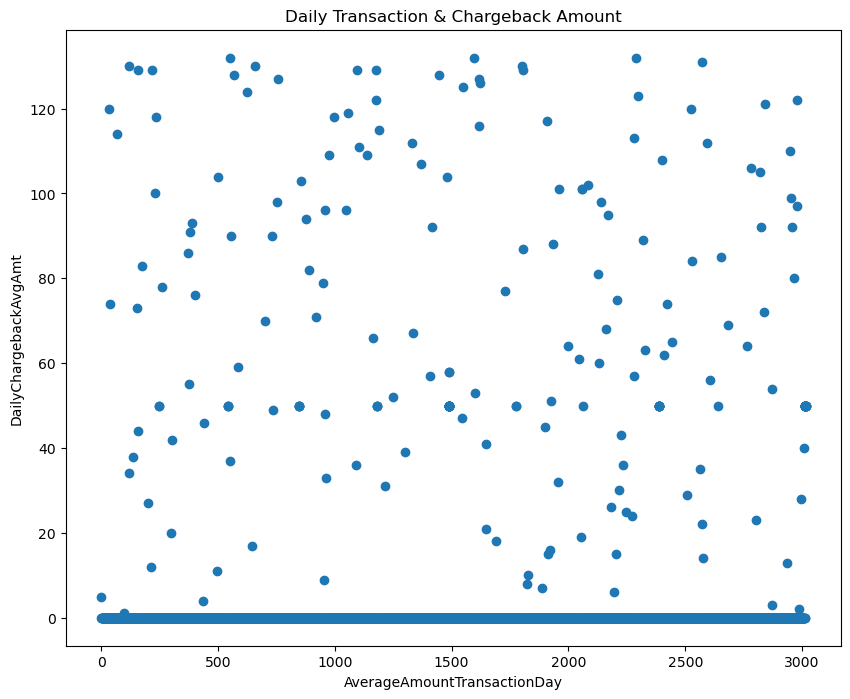

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['AverageAmountTransactionDay'],df['DailyChargebackAvgAmt'])
ax.set_xlabel('AverageAmountTransactionDay')
ax.set_ylabel('DailyChargebackAvgAmt')
ax.set_title('Daily Transaction & Chargeback Amount')
plt.show()

In [17]:
df.columns

Index(['AverageAmountTransactionDay', 'TransactionAmount', 'Is_declined',
       'TotalNumberOfDeclinesDay', 'isForeignTransaction', 'isHighRiskCountry',
       'DailyChargebackAvgAmt', '6_MonthAvgChbkAmt', '6_MonthChbkFreq',
       'isFradulent'],
      dtype='object')

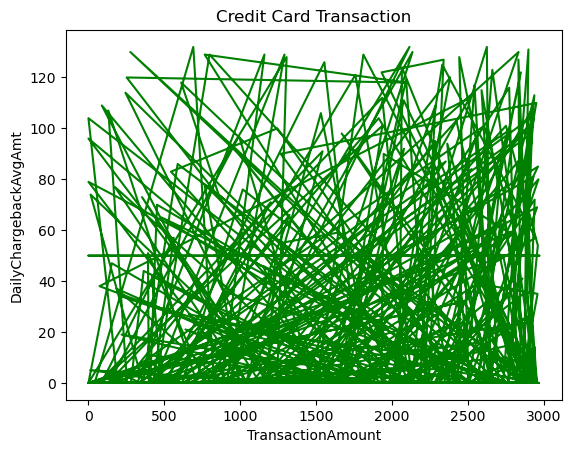

In [18]:
plt.plot(df["TransactionAmount"], df["DailyChargebackAvgAmt"], color='g')
plt.xlabel('TransactionAmount')
plt.ylabel('DailyChargebackAvgAmt')
plt.title('Credit Card Transaction')
plt.show()

In [19]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='isFradulent', axis=1)
#Response variable
y = df.loc[:,'isFradulent'] 

In [20]:
#We'll use a test size of 20%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  2460
Number of test dataset:  615
Total number of dataset:  3075


In [21]:
def qul_No_qul_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["isFradulent"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Credit Card Transaction (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



In [22]:
def qul_No_qul_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["isFradulent"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Credit Card Transaction (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



isFradulent,0,1
TotalNumberOfDeclinesDay,,
0,93.67,6.33
1,87.31,12.69
2,61.96,38.04
3,67.07,32.93
4,65.22,34.78
5,56.32,43.68
6,71.88,28.12
7,2.70,97.30
8,2.22,97.78


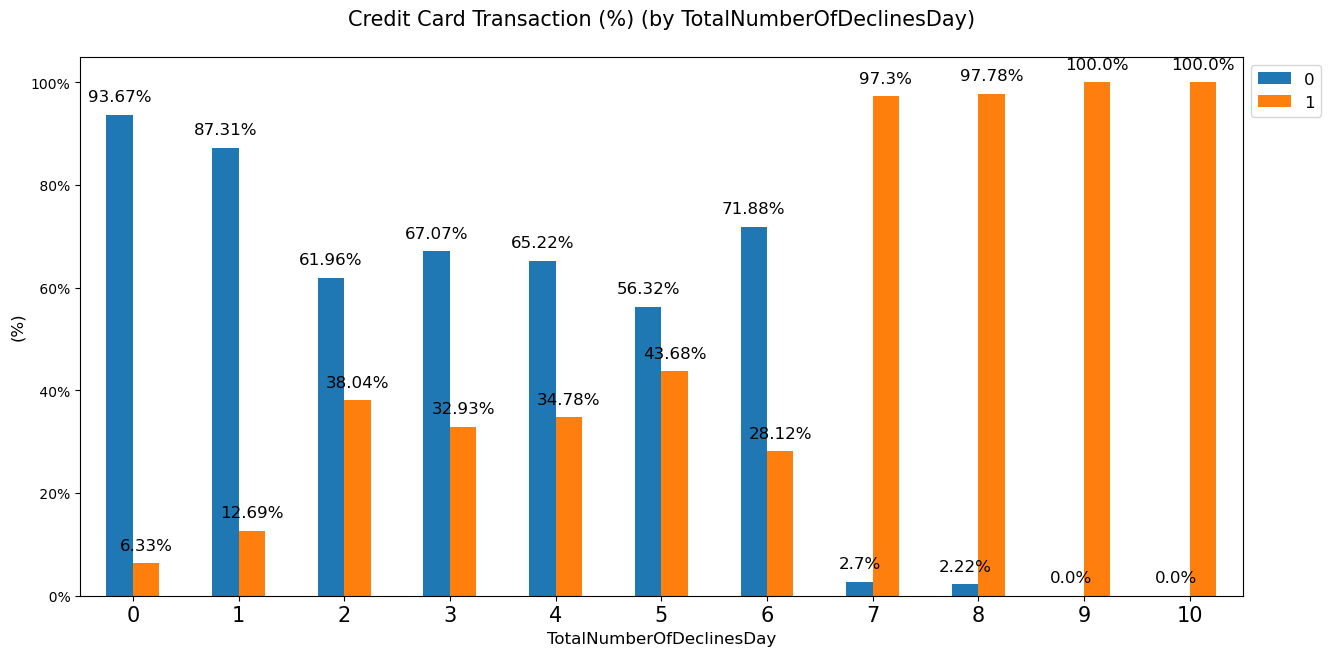

In [23]:
qul_No_qul_bar_plot(df,'TotalNumberOfDeclinesDay')